# **Fraud Detection (Classification)**
### Using ready DataSet

# Introduction
Credit card fraud detection is a crucial application of machine learning in financial systems. However, fraud cases are rare, making the dataset highly imbalanced, which poses challenges for predictive modeling. This notebook demonstrates how to effectively address these challenges using machine learning techniques.

# Objectives:

* Detect fraudulent transactions from credit card data.
* Handle the issue of data imbalance.
* Compare model performance and select the best approach.


# Dataset Overview
The dataset used for this project contains transactions made by credit cards. It includes a highly imbalanced set of observations, where fraudulent transactions are a small fraction of the total.

# Features:

* V1-V28: Principal components obtained via PCA.
* Amount: Transaction amount.
* Time: Time elapsed from the first transaction.
* Class: Fraud status (0 for non-fraud, 1 for fraud).

# Exploratory Data Analysis (EDA)
To understand the data distribution and identify potential issues:

* Plot the distribution of features.
* Visualize the imbalance in the Class variable.
* Investigate correlations between features.

# Data Preprocessing
* Check for missing or null values.
* Handle duplicates.
* Scale the features (Amount, Time).
* Split features and target.

# Handling Imbalanced Data
Given the highly imbalanced nature of the dataset, special techniques are applied:

### Resampling:

* Oversampling  : Synthetic Minority Oversampling Technique (SMOTE).
* Undersampling : Random undersampling.

# Evaluation Metrics

* Accuracy may not be suitable for imbalanced data. We use:
  *  Precision, Recall, F1-score

### Modeling and Evaluation
 We apply and evaluate several machine learning models:

* Logistic Regression
* Decision Tree
* Random Forest

##### For each model:

* Train on the imbalanced dataset and again on resampled dataset.
* Evaluate performance using confusion matrices.
* Compare results based on evaluation metrics.


# Save the Trained Models
After training and evaluating the machine learning models, it is crucial to save them for future use. This allows you to avoid retraining the models every time you need to make predictions and facilitates easy deployment.

In this step, we will save the trained models using Python's joblib and pickle library. This will enable us to load and use the models later without needing to retrain them.

**===============*===============*===============*=============*


# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import joblib
import pickle

# Load and Explore the Dataset

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
248873,154137.0,2.015413,-0.051316,-1.717090,0.118628,0.464202,-0.674465,0.325910,-0.194432,0.377055,...,0.163826,0.568593,0.041695,0.712071,0.334651,-0.569435,-0.016553,-0.060938,14.00,0
58436,48388.0,1.360369,-1.334755,0.727724,-1.446279,-1.704980,-0.046914,-1.448911,0.189032,-1.712461,...,0.038118,0.411310,-0.009903,-0.015089,0.217322,-0.069874,0.050625,0.015138,40.00,0
169354,119654.0,-0.921228,0.825648,1.407890,-1.164282,0.503445,-0.138548,0.985118,0.046864,-0.784409,...,-0.401252,-1.417607,0.039461,0.709530,0.068739,0.078006,-0.165677,0.038175,45.23,0
219951,141953.0,-0.810636,-0.071353,-2.699272,0.917817,1.310331,-2.272895,0.616633,0.171183,0.068810,...,0.181710,-0.001903,0.265272,-0.392231,-0.104243,-0.501878,0.142383,-0.200526,143.77,0
70044,53683.0,0.920511,-0.789066,0.040302,0.450297,-0.554308,0.090571,-0.087135,0.073249,-1.358306,...,-0.675141,-1.995605,0.132555,-0.440561,-0.017209,-0.819470,0.008209,0.047894,191.31,0


In [ ]:
# Display All Columns
pd.options.display.max_columns
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Display dataset shape
data.shape

(284807, 31)

In [ ]:
print(f'Number of columns: {data.shape[1]}')
print(f'Number of rows: {data.shape[0]}')

Number of columns: 31
Number of rows: 284807


In [ ]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Summary statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Visualize Class Imbalance
Use seaborn to visualize the distribution of the target variable to understand class imbalance.

In [ ]:
Target = data.iloc[:, -1]
Target.value_counts()

,count
Class,
0,284315
1,492


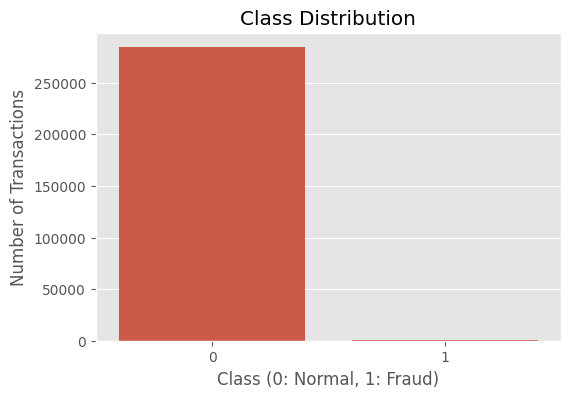

In [ ]:
# Visualize the distribution of the target variable

plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
sns.countplot(x ='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
# Check for missing values
data.isnull().sum().sum()

0

In [ ]:
# Drop rows with null values in the 'Class' column
data.dropna(subset=['Class'])

# Fill null values in the 'Amount' column with the mean
data['Amount'].fillna(data['Amount'].mean(), inplace=True)


<ipython-input-239-960e0323b3f2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Amount'].fillna(data['Amount'].mean(), inplace=True)


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
# Check for duplicate rows
data.duplicated().sum()

1081

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
284802,False
284803,False
284804,False
284805,False


In [ ]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(283726, 31)

In [ ]:
# Standardize 'Amount' and 'Time'
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [ ]:
feature = data.drop('Class', axis=1)
target = data['Class']

In [ ]:
feature.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813


In [ ]:
target.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

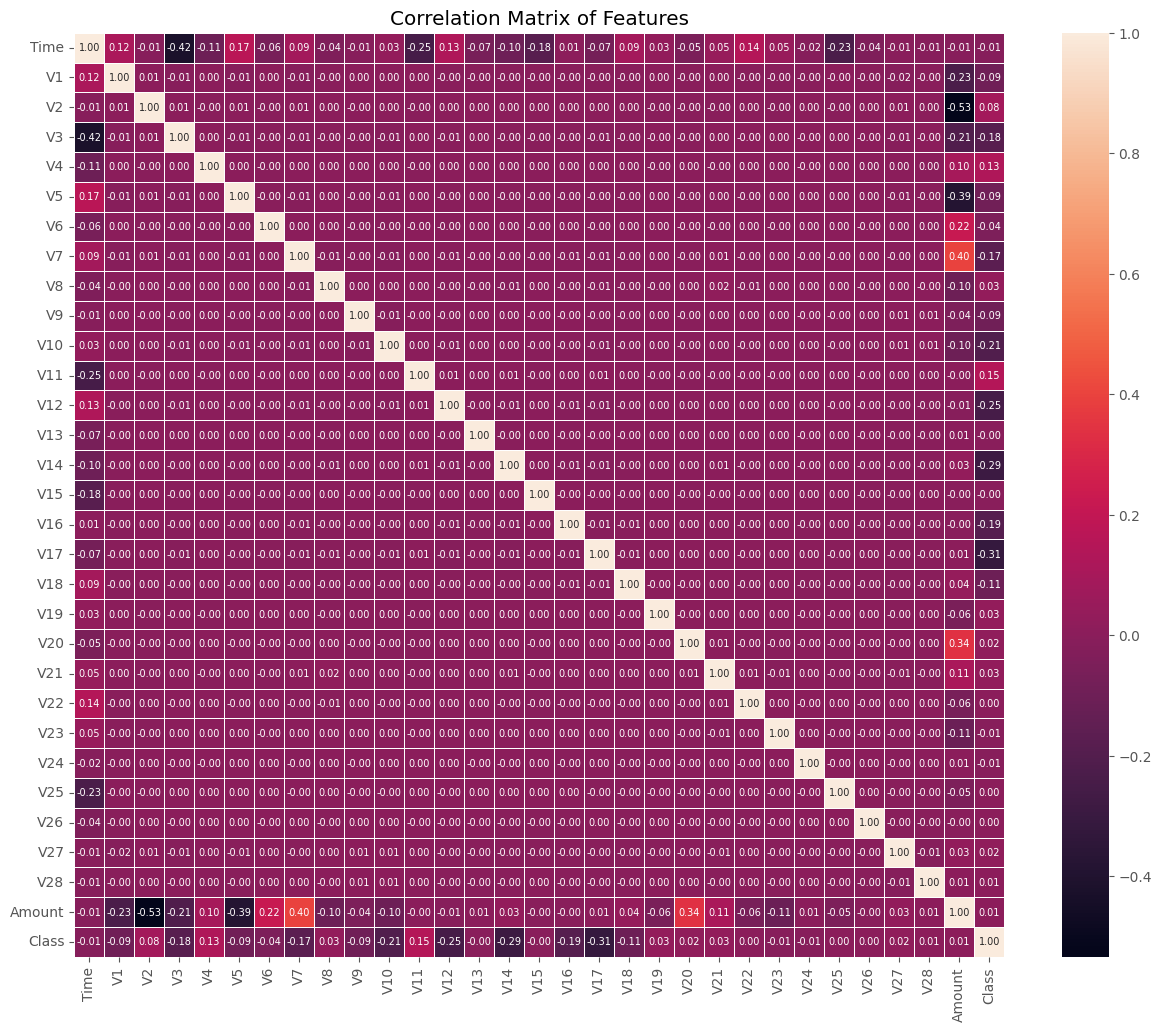

In [ ]:
# Plot the Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size":7})
plt.title('Correlation Matrix of Features')
plt.show()

## Handling Imbalanced Data
Two techniques:

* Undersampling
* Oversampling

# **Undersampling**

In [ ]:
# Separate normal and fraud transactions
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

# Print shape for reference
print(f"Normal transactions shape: {normal.shape}")
print(f"Fraud transactions shape: {fraud.shape}")

Normal transactions shape: (283253, 31)
Fraud transactions shape: (473, 31)


In [ ]:
# Undersample normal transactions
normal_sample = normal.sample(n=fraud.shape[0])

# Print the shape of the new normal transactions
print(f"New normal transactions shape: {normal_sample.shape}")

New normal transactions shape: (473, 31)


In [ ]:
# Concate updated normal transcations with old fraud transaction and make a new df
new_data = pd.concat([normal_sample, fraud], ignore_index=True)

In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.869926,-3.685675,-3.618050,1.031271,1.047067,2.334876,-2.697815,-2.205953,0.789633,0.447478,...,0.324365,-0.725535,-0.061146,-0.066655,-0.474865,-0.499715,0.111072,-0.584000,-0.349333,0
1,0.569469,-2.535779,-1.390799,-1.378233,-0.353629,2.923872,-1.731988,0.719580,0.240186,-1.088206,...,0.708261,0.945226,-0.451409,0.363799,1.132291,-0.237657,-0.069461,-0.343581,0.089966,0
2,-1.035238,-1.009252,0.220717,1.336799,-1.219312,0.833250,-0.498797,1.486822,-0.295061,-0.929503,...,-0.334184,-1.257382,0.100974,-0.346532,0.230172,0.528680,-0.302903,-0.178870,0.153744,0
3,-1.568167,-0.592122,0.321822,2.312376,-1.885242,-0.154445,-0.221435,0.308437,-0.100999,2.867348,...,-0.232516,-0.192313,-0.456314,-0.560311,0.520086,-0.784221,-0.094867,-0.164441,-0.306002,0
4,1.349929,-0.183537,1.183149,-0.762221,-0.497178,0.532765,-0.904285,0.721218,0.164680,-0.132523,...,0.367930,1.200371,-0.153242,-0.617228,-0.673804,-0.176835,0.382300,0.253672,-0.322935,0


In [ ]:
new_data.shape

(946, 31)

In [ ]:
473+473

946

In [ ]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [ ]:
feature = new_data.drop('Class', axis=1)
target = new_data['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [ ]:
# Train models with undersampled data
def train_model(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    trained_models = {}
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Store trained model
        trained_models[name] = model  # Save actual model, not metrics

        # Store evaluation metrics
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-score': f1_score(y_test, y_pred)
        }

    return trained_models, results   # Return trained models and results separately


# Call function
trained_models, results = train_model(x_train, x_test, y_train, y_test)

# Print results
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Logistic Regression:
  Accuracy: 0.9421
  Precision: 0.9789
  Recall: 0.9118
  F1-score: 0.9442
Decision Tree:
  Accuracy: 0.8947
  Precision: 0.8868
  Recall: 0.9216
  F1-score: 0.9038
Random Forest:
  Accuracy: 0.9474
  Precision: 0.9792
  Recall: 0.9216
  F1-score: 0.9495


# Oversampling
* Use SMOTE to balance the dataset by oversampling the minority class

In [ ]:
feature = data.drop('Class', axis=1)
target = data['Class']

In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(feature, target)

In [ ]:
# Check new class distribution
y_resampled.value_counts()

,count
Class,
0,283253
1,283253


In [ ]:
x_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Train models with Oversampled data
def train_model(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    trained_models = {}
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Store trained model
        trained_models[name] = model  # Save actual model, not metrics

        # Store evaluation metrics
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-score': f1_score(y_test, y_pred)
        }

    return trained_models, results  # Return trained models and results separately


# Call function
trained_models, results = train_model(x_train, x_test, y_train, y_test)

# Print results
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Logistic Regression:
  Accuracy: 0.9453
  Precision: 0.9726
  Recall: 0.9167
  F1-score: 0.9438
Decision Tree:
  Accuracy: 0.9983
  Precision: 0.9975
  Recall: 0.9991
  F1-score: 0.9983
Random Forest:
  Accuracy: 0.9999
  Precision: 0.9998
  Recall: 1.0000
  F1-score: 0.9999


In [ ]:
# Save the trained models using joblib
joblib.dump(results['Decision Tree'], 'decision_tree_model.pkl')
joblib.dump(results['Random Forest'], 'random_forest_model.pkl')

print("Models saved successfully!")


Models saved successfully!


In [ ]:
# Save trained models using pickle
with open('decision_tree_model.pkl', 'wb') as dt_file:
    pickle.dump(trained_models['Decision Tree'], dt_file)

with open('random_forest_model.pkl', 'wb') as rf_file:
    pickle.dump(trained_models['Random Forest'], rf_file)

print(" Models saved successfully using pickle!")

 Models saved successfully using pickle!


In [ ]:
# Load the models correctly
with open('decision_tree_model.pkl', 'rb') as dt_file:
    decision_tree_model = pickle.load(dt_file)

with open('random_forest_model.pkl', 'rb') as rf_file:
    random_forest_model = pickle.load(rf_file)

print("Models loaded successfully!")

Models loaded successfully!


In [ ]:
#  Sample data for prediction
sample_data = np.array([[-1.2063, -0.6534, 1.1557, 1.4398, -0.0483, -0.2579, -0.7633, 0.3392, -0.7687,
                         -0.1155, -0.2002, -0.6509, -0.7357, -1.3940, 0.4477, 0.9847, 0.2712, -0.2510,
                         -0.1654, 0.0091, -0.1604, 0.5180, -0.9706, 0.1048, 0.3079, -0.2225, 0.0825,
                         0.2916, 0.1254, -0.3442]])

#  Make predictions using the loaded models
dt_pred = decision_tree_model.predict(sample_data)
rf_pred = random_forest_model.predict(sample_data)

# Print the results
print("Decision Tree Prediction:", "Fraud" if dt_pred[0] == 1 else "Normal Transaction")
print("Random Forest Prediction:", "Fraud" if rf_pred[0] == 1 else "Normal Transaction")

Decision Tree Prediction: Normal Transaction
Random Forest Prediction: Normal Transaction


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Using Unready Data
* Loads & Preprocesses the Data (handles missing values, encoding, scaling)
* Handles Class Imbalance (Applies Undersampling & Oversampling using SMOTE)
* Trains a Decision Tree Model
* Saves the Model & Scaler using pickle
* Loads the Model & Scaler for Predictions
* Makes a Prediction on New Data


# Objectives

* Predict the risk level associated with credit applicants.

* Handle class imbalance in the dataset to improve model accuracy.

* Compare different machine learning models and select the best-performing one.

* Save and deploy the trained models for future predictions.

# Dataset Overview

The dataset includes various customer attributes related to creditworthiness. Key features include:

## Features

* Gender: Customer's gender (M/F).

* Car: Whether the applicant owns a car (Y/N).

* Reality: Whether the applicant owns real estate (Y/N).

* No_of_Children: Number of children.

* Income: Annual income of the applicant.

* Income_Type: Employment type (e.g., Working, Commercial Associate, etc.).

* Education_Type: Applicant's highest education level.

* Family_Type: Marital status and family type.

* House_Type: Type of housing owned (e.g., Apartment, House).

* Flag_Mobile: Mobile phone ownership.

* Work_Phone: Whether the applicant has a work phone.

* Phone: Personal phone ownership.

* E_Mail: Whether the applicant has an email.

* Family_Size: Number of family members.

* Begin_Month: Number of months since the application process started.

* Age: Applicant’s age.

* Years_Employed: Number of years the applicant has been employed.

# Exploratory Data Analysis (EDA)

To better understand the dataset, the following steps will be performed:

* Analyze distributions of numerical and categorical variables.

* Identify missing values and potential data inconsistencies.

* Examine correlations between features to select the most relevant ones.

# Data Preprocessing

* Handling Missing Values: Identify and address missing or null values.

* Encoding Categorical Variables: Convert non-numeric features into numerical representations using label encoding or one-hot encoding.

* Feature Scaling: Normalize numerical features to improve model performance.

* Splitting Data: Divide data into training and test sets.

# Handling Imbalanced Data

Given that credit risk datasets are often imbalanced, we apply:

* Oversampling: Synthetic Minority Oversampling Technique (SMOTE) to generate additional data for underrepresented classes.

* Undersampling: Randomly reducing the number of instances in the majority class.

# Modeling and Evaluation

Several machine learning models will be trained and evaluated:

* Logistic Regression

* Decision Tree Classifier

* Random Forest Classifier

Each model will be trained using the original dataset and the resampled dataset. Evaluation metrics include:

* Accuracy

* Precision

* Recall

* F1-score

* Confusion Matrix Analysis

# Saving and Deploying the Model

Once the best model is selected:

* Save the trained model and preprocessing scaler using pickle or joblib.

* Load the saved model for future predictions on new applicants.

* Implement a function to take new applicant data and return a credit risk prediction.

In [ ]:
data = pd.read_csv('/content/credit_dataset.csv')

In [ ]:
data.columns

Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

In [ ]:
data.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [ ]:
data.tail()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1
25133,25133,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,1.0,13,25,3,1


In [ ]:
data.sample(5)

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
19753,19753,5116789,F,N,Y,0,81000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,2.0,6,54,8,0
3859,3859,5028360,F,N,Y,0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,2.0,55,54,7,0
5699,5699,5146581,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,1,0,0,0,2.0,28,45,9,0
22297,22297,5137032,M,Y,N,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,3.0,30,39,1,0
7050,7050,5045554,M,Y,N,1,180000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,0,0,3.0,25,40,3,0


In [ ]:
# Display All Columns
pd.options.display.max_columns
data.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [ ]:
# Display dataset shape
data.shape

(25134, 20)

In [ ]:
print(f'Number of columns: {data.shape[1]}')
print(f'Number of rows: {data.shape[0]}')

Number of columns: 20
Number of rows: 25134


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [ ]:
data.describe()

,Unnamed: 0,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000000,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,12566.500000,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,7255.705169,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,0.000000,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,6283.250000,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,12566.500000,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,18849.750000,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,25133.000000,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


In [ ]:
Target = data.iloc[:, -1]
Target.value_counts()

,count
TARGET,
0,24712
1,422


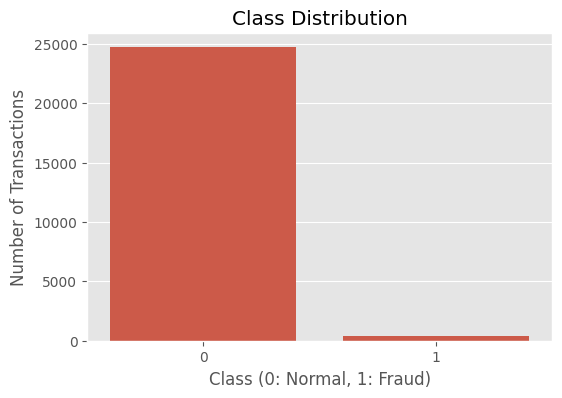

In [ ]:
# Visualize the distribution of the target variable

plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
sns.countplot(x ='TARGET', data=data)
plt.title('Class Distribution')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
# Check for missing values
data.isnull().sum().sum()

0

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
ID,0
GENDER,0
CAR,0
REALITY,0
NO_OF_CHILD,0
INCOME,0
INCOME_TYPE,0
EDUCATION_TYPE,0
FAMILY_TYPE,0


In [ ]:
# Check for duplicate rows
data.duplicated().sum()

0

In [ ]:
data = data.drop(data.columns[[0, 1]], axis=1)  # Drops the first two columns (index 0 and 1)

# Using iloc to select columns
# data = data.iloc[:, 2:]  # Selects all rows and columns from the third column onwards
data.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [ ]:
# Encoding Categorical Variables
label_encoders = {}
categorical_columns = ['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature Scaling
scaler = StandardScaler()
numerical_columns = ['INCOME', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [ ]:
data.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,-0.787817,4,4,1,1,1,0,0,0,-0.310334,0.175154,1.931508,-0.655447,0
1,0,0,1,0,0.719232,0,4,3,1,1,0,1,1,-1.365665,-1.345590,1.199236,0.124085,0
2,0,0,1,0,0.719232,0,4,3,1,1,0,1,1,-1.365665,-0.007336,1.199236,0.124085,0
3,0,0,1,0,0.719232,0,4,3,1,1,0,1,1,-1.365665,-0.007336,1.199236,0.124085,0
4,0,0,1,0,0.719232,0,4,3,1,1,0,1,1,-1.365665,0.722621,1.199236,0.124085,0


In [ ]:
data.shape

(25134, 18)

# Handling Imbalanced Data
Two techniques:

* Undersampling
* Oversampling

# **Undersampling**

In [ ]:
# Separate normal and fraud transactions
normal = data[data['TARGET']==0]
fraud = data[data['TARGET']==1]

# Print shape for reference
print(f"Normal transactions shape: {normal.shape}")
print(f"Fraud transactions shape: {fraud.shape}")

Normal transactions shape: (24712, 18)
Fraud transactions shape: (422, 18)


In [ ]:
# Undersample normal transactions
normal_sample = normal.sample(n=fraud.shape[0])

# Print the shape of the new normal transactions
print(f"New normal transactions shape: {normal_sample.shape}")

New normal transactions shape: (422, 18)


In [ ]:
# Concate updated normal transcations with old fraud transaction and make a new df
new_data = pd.concat([normal_sample, fraud], ignore_index=True)
new_data.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,0,1,1,2.010988,0,1,1,1,1,0,0,0,0.744996,-1.345590,-0.892971,-0.187728,0
1,0,0,1,0,-0.572524,4,1,1,1,1,0,0,0,-0.310334,-1.588909,-0.474530,-0.499541,0
2,0,0,1,2,-1.175343,4,4,1,1,1,0,0,0,1.800326,-0.615633,-0.265309,-0.187728,0
3,1,1,1,1,-0.572524,0,1,1,1,1,1,1,0,0.744996,-1.163100,0.990015,-0.967260,0
4,0,0,1,1,-0.141939,2,4,3,1,1,0,1,0,-0.310334,1.270089,-0.369920,0.591804,0


In [ ]:
new_data.shape

(844, 18)

In [ ]:
new_data['TARGET'].value_counts()

,count
TARGET,
0,422
1,422


In [ ]:
feature = new_data.drop('TARGET', axis=1)
target = new_data['TARGET']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [ ]:
# Train models with undersampled data
def train_model(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    trained_models = {}
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Store trained model
        trained_models[name] = model  # Save actual model, not metrics

        # Store evaluation metrics
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-score': f1_score(y_test, y_pred)
        }

    return trained_models, results   # Return trained models and results separately


# Call function
trained_models, results = train_model(x_train, x_test, y_train, y_test)

# Print results
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Logistic Regression:
  Accuracy: 0.5799
  Precision: 0.5946
  Recall: 0.5176
  F1-score: 0.5535
Decision Tree:
  Accuracy: 0.5325
  Precision: 0.5417
  Recall: 0.4588
  F1-score: 0.4968
Random Forest:
  Accuracy: 0.6272
  Precision: 0.6667
  Recall: 0.5176
  F1-score: 0.5828


# Oversampling
* Use SMOTE to balance the dataset by oversampling the minority class

In [ ]:
feature = data.drop('TARGET', axis=1)
target = data['TARGET']

In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(feature, target)

In [ ]:
# Check new class distribution
y_resampled.value_counts()

,count
TARGET,
0,24712
1,24712


In [ ]:
x_resampled.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,1,1,1,0,-0.787817,4,4,1,1,1,0,0,0,-0.310334,0.175154,1.931508,-0.655447
1,0,0,1,0,0.719232,0,4,3,1,1,0,1,1,-1.365665,-1.345590,1.199236,0.124085
2,0,0,1,0,0.719232,0,4,3,1,1,0,1,1,-1.365665,-0.007336,1.199236,0.124085
3,0,0,1,0,0.719232,0,4,3,1,1,0,1,1,-1.365665,-0.007336,1.199236,0.124085
4,0,0,1,0,0.719232,0,4,3,1,1,0,1,1,-1.365665,0.722621,1.199236,0.124085


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Train models with Oversampled data
def train_model(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    trained_models = {}
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Store trained model
        trained_models[name] = model  # Save actual model, not metrics

        # Store evaluation metrics
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-score': f1_score(y_test, y_pred)
        }

    return trained_models, results  # Return trained models and results separately


# Call function
trained_models, results = train_model(x_train, x_test, y_train, y_test)

# Print results
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Logistic Regression:
  Accuracy: 0.6834
  Precision: 0.6863
  Recall: 0.6868
  F1-score: 0.6866
Decision Tree:
  Accuracy: 0.9701
  Precision: 0.9705
  Recall: 0.9701
  F1-score: 0.9703
Random Forest:
  Accuracy: 0.9903
  Precision: 0.9906
  Recall: 0.9902
  F1-score: 0.9904


In [ ]:
# Save trained models using pickle
with open('decision_tree_model2.pkl', 'wb') as dt_file:
    pickle.dump(trained_models['Decision Tree'], dt_file)

with open('random_forest_model2.pkl', 'wb') as rf_file:
    pickle.dump(trained_models['Random Forest'], rf_file)

print(" Models saved successfully using pickle!")

 Models saved successfully using pickle!


In [ ]:
# Load the models correctly
with open('decision_tree_model2.pkl', 'rb') as dt_file:
    decision_tree_model = pickle.load(dt_file)

with open('random_forest_model2.pkl', 'rb') as rf_file:
    random_forest_model = pickle.load(rf_file)

print("Models loaded successfully!")

Models loaded successfully!


In [ ]:
# Sample test input (replace with real values as needed)
sample_test = np.array([[0, 1, 1, 0, 150000, 4, 4, 1, 1, 1, 0, 0, 0, 2, 12, 45, 5]])

# Ensure the input shape matches training data
prediction_dt = decision_tree_model.predict(sample_test)
prediction_rf = random_forest_model.predict(sample_test)

# Print the results
print("Decision Tree Prediction:", "Fraud" if dt_pred[0] == 1 else "Normal Transaction")
print("Random Forest Prediction:", "Fraud" if rf_pred[0] == 1 else "Normal Transaction")

Decision Tree Prediction: Normal Transaction
Random Forest Prediction: Normal Transaction


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Sample new data point (Ensure feature names match exactly)
sample_data = np.array([['M', 'Y', 'Y', 1, 150000.0, 'Working', 'Higher education', 'Married', 'House / apartment',
                         1, 1, 0, 1, 3.0, 12, 45, 10]])

# Correct column names (EXACTLY as in training data)
columns = ['GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE',
           'HOUSE_TYPE', 'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE',
           'YEARS_EMPLOYED']

# Create DataFrame
sample_df = pd.DataFrame(sample_data, columns=columns)
sample_df

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,M,Y,Y,1,150000.0,Working,Higher education,Married,House / apartment,1,1,0,1,3.0,12,45,10


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Sample new data
sample_data = np.array([['M', 'Y', 'Y', 1, 150000.0, 'Working', 'Higher education', 'Married', 'House / apartment',
                         1, 1, 0, 1, 3.0, 12, 45, 10]])

# Define correct column names
columns = ['GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE',
           'HOUSE_TYPE', 'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE',
           'YEARS_EMPLOYED']

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data, columns=columns)

# Identify categorical columns (excluding numeric ones)
categorical_columns = ['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']

# Load label encoders (use the same classes as in training)
label_encoders = {}

# Manually define the original categories (must match training)
categories = {
    'GENDER': ['F', 'M'],
    'CAR': ['N', 'Y'],
    'REALITY': ['N', 'Y'],
    'INCOME_TYPE': ['Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working'],
    'EDUCATION_TYPE': ['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special'],
    'FAMILY_TYPE': ['Civil marriage', 'Married', 'Separated', 'Single / not married', 'Widow'],
    'HOUSE_TYPE': ['Co-op apartment', 'House / apartment', 'Municipal apartment', 'Office apartment', 'Rented apartment', 'With parents']
}

# Encode categorical values
for col in categorical_columns:
    le = LabelEncoder()
    le.classes_ = np.array(categories[col])  # Set classes manually

    # Handle unseen values by replacing them with the most frequent category
    sample_df[col] = sample_df[col].apply(lambda x: x if x in categories[col] else categories[col][0])
    sample_df[col] = le.transform(sample_df[col])

# Convert numerical columns to correct types
numerical_columns = ['NO_OF_CHILD', 'INCOME', 'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL',
                     'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED']

sample_df[numerical_columns] = sample_df[numerical_columns].astype(float)

sample_df


,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,1,1,1,1.0,150000.0,4,1,1,1,1.0,1.0,0.0,1.0,3.0,12.0,45.0,10.0


In [ ]:
# Ensure the input shape matches training data
prediction_dt = decision_tree_model.predict(sample_df)
prediction_rf = random_forest_model.predict(sample_df)

# Print the results
print("Decision Tree Prediction:", "Fraud" if prediction_dt[0] == 1 else "Normal Transaction")
print("Random Forest Prediction:", "Fraud" if prediction_rf[0] == 1 else "Normal Transaction")


Decision Tree Prediction: Normal Transaction
Random Forest Prediction: Normal Transaction
